In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [2]:
dataset=pd.read_csv("salary_data.csv")

In [3]:
dataset.head(3)

,level,Salary
0,1,39343
1,2,46205
2,3,37731


In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.columns =dataset.columns.str.strip() #to remove space

In [6]:
dataset.columns

Index(['level', 'Salary'], dtype='object')

In [7]:
dataset.isnull().sum()

level     0
Salary    0
dtype: int64

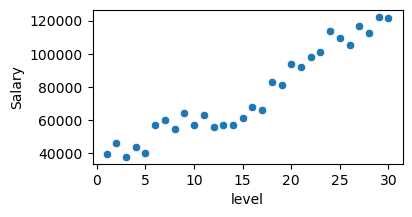

In [8]:
plt.figure(figsize=(4,2))
sns.scatterplot(x="level", y="Salary", data=dataset)
plt.xlabel("level")
plt.ylabel("Salary")
plt.show()

In [9]:
x=dataset[["level"]]
y=dataset["Salary"]

In [10]:
pr=PolynomialFeatures(degree=2) 

In [11]:
pr.fit(x)

PolynomialFeatures()

In [12]:
x= pr.transform(x)

In [13]:
x_train, x_test , y_train , y_test=train_test_split(x,y,test_size=0.2 ,random_state =42)

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(x_train ,y_train)

LinearRegression()

In [16]:
lr.score(x_test,y_test) *100

87.9712787902108

In [17]:
lr.coef_

array([  0.        , 853.89013395,  69.41188597])

In [18]:
lr.intercept_

np.float64(40188.157503852875)

In [19]:
#y=m1x1 + m1x2^2 +c
# y= 853.89013395*x1 + 69.41188597 +x2^2  + 40188.157503852875

In [20]:
y_prd=lr.predict(x)

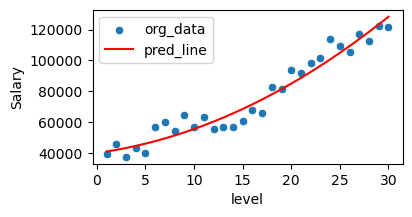

In [21]:
plt.figure(figsize=(4,2))
sns.scatterplot(x="level", y="Salary", data=dataset , label="org_data")
plt.plot(dataset["level"] ,y_prd,color="red" , label="pred_line")
plt.xlabel("level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [22]:
test=pr.transform([[15]])
test

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  1.,  15., 225.]])

In [23]:
lr.predict(test)

array([68614.18385579])